In [ ]:
from zipfile import ZipFile
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import resize
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
# GET DATA FROM DRIVE

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
MODEL_PATH = "/content/PokemonTrainerDropout20.h5"

model = load_model(MODEL_PATH)

In [ ]:
DATA_DIR = "/content/drive/MyDrive/Datasets/ProcessedPokemonData7_split1.zip"

In [ ]:
def OpenZip(path, destination=None):
  """
  Args: 
       path : a `str` type that represents location of zipfile
       destination : a `str` type that represents where to extract the zipfile
  Returns:
        None
        
  Extract zip file to desired location
  """
  with ZipFile(path, "r") as f:
    print("Extracting files...")
    f.extractall(destination)
    print("Done!")

In [ ]:
OpenZip(DATA_DIR)

Extracting files...
Done!


In [ ]:
TRAIN_DIR = "/content/training"
TEST_DIR = "/content/validation"

In [ ]:
# labels
pokemon_type = sorted(os.listdir(TRAIN_DIR))
pokemon_type

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

In [ ]:
def read_feed_images_to_model(im_path):
  image_to_plot = img_to_array(load_img(im_path)) / 255. # normalize them in order to use plt.imshow
  image_to_predict = img_to_array(load_img(im_path))
  image_to_predict = resize(image_to_predict, (32, 32))
  image_to_predict = tf.expand_dims(image_to_predict, axis=0)
  return image_to_predict, image_to_plot

In [ ]:
def prediction_test(path):
  image_to_predict, image_to_plot = read_feed_images_to_model(path)
  predicted_label = np.argmax(model.predict(image_to_predict))
  ground_truth = path.split('/')[-2]
  predicted_label = pokemon_type[predicted_label]
  print(f"\n{path} is type of {ground_truth}\n\n"
          f"Predicted as: {predicted_label}")
  plt.subplot(1, 2, 1)
  plt.imshow(image_to_plot)
  plt.axis("off")
  plt.title(f"Type {ground_truth} Predicted as: {predicted_label}")

# Observe Train and Validation Data

1/1 [==============================] - 0s 19ms/step

/content/training/Psychic/icons177.png is type of Psychic

Predicted as: Psychic


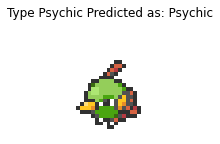

In [ ]:
prediction_test("/content/training/Psychic/icons177.png")

1/1 [==============================] - 0s 18ms/step

/content/training/Poison/sugimori34.png is type of Poison

Predicted as: Poison


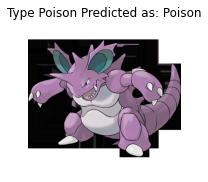

In [ ]:
prediction_test("/content/training/Poison/sugimori34.png")

1/1 [==============================] - 0s 23ms/step

/content/training/Poison/main-spritessilver38.png is type of Poison

Predicted as: Water


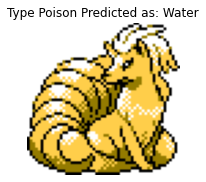

In [ ]:
prediction_test("/content/training/Poison/main-spritessilver38.png")

1/1 [==============================] - 0s 17ms/step

/content/validation/Water/conquest516.png is type of Water

Predicted as: Water


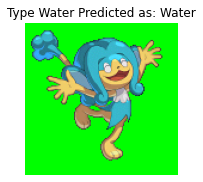

In [ ]:
prediction_test("/content/validation/Water/conquest516.png")

1/1 [==============================] - 0s 21ms/step

/content/training/Fairy/main-spritesplatinum41.png is type of Fairy

Predicted as: Water


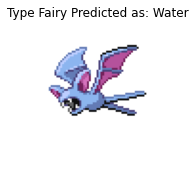

In [ ]:
prediction_test("/content/training/Fairy/main-spritesplatinum41.png")

1/1 [==============================] - 0s 17ms/step

/content/training/Fire/overworldright44.png is type of Fire

Predicted as: Water


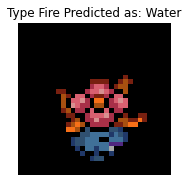

In [ ]:
prediction_test("/content/training/Fire/overworldright44.png")

1/1 [==============================] - 0s 20ms/step

/content/validation/Flying/sugimori641.png is type of Flying

Predicted as: Bug


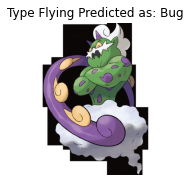

In [ ]:
prediction_test("/content/validation/Flying/sugimori641.png")

1/1 [==============================] - 0s 18ms/step

/content/validation/Ghost/icons609.png is type of Ghost

Predicted as: Water


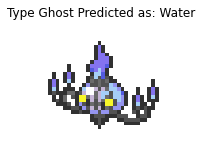

In [ ]:
prediction_test("/content/validation/Ghost/icons609.png")

1/1 [==============================] - 0s 19ms/step

/content/validation/Grass/sugimori69.png is type of Grass

Predicted as: Grass


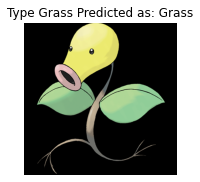

In [ ]:
prediction_test("/content/validation/Grass/sugimori69.png")

1/1 [==============================] - 0s 18ms/step

/content/validation/Electric/sugimori466.png is type of Electric

Predicted as: Electric


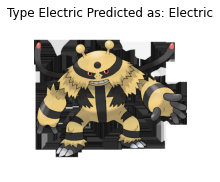

In [ ]:
prediction_test("/content/validation/Electric/sugimori466.png")

# Test the Test Data :D

1/1 [==============================] - 0s 20ms/step

/content/bulbasaur.jpg is type of content

Predicted as: Water


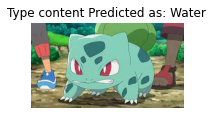

In [ ]:
prediction_test("/content/bulbasaur.jpg")

1/1 [==============================] - 0s 28ms/step

/content/bluelans_bluelans_cute_cartoon_pokemon_pikachu_c002_car_sticker_full02.webp is type of content

Predicted as: Electric


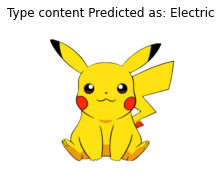

In [ ]:
prediction_test("/content/bluelans_bluelans_cute_cartoon_pokemon_pikachu_c002_car_sticker_full02.webp")

1/1 [==============================] - 0s 38ms/step

/content/8ef75a96b149db3ad390539aa913dcf06ec1ff57_original.jpeg is type of content

Predicted as: Grass


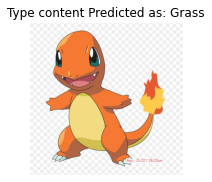

In [ ]:
prediction_test("/content/8ef75a96b149db3ad390539aa913dcf06ec1ff57_original.jpeg")

1/1 [==============================] - 0s 19ms/step

/content/pokemon-2-beedrill.jpg is type of content

Predicted as: Normal


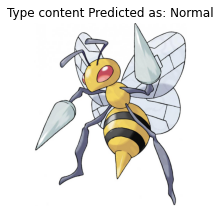

In [ ]:
prediction_test("/content/pokemon-2-beedrill.jpg")

1/1 [==============================] - 0s 17ms/step

/content/glalie-128x128.png is type of content

Predicted as: Water


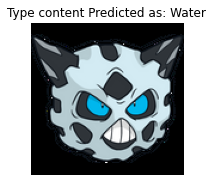

In [ ]:
prediction_test("/content/glalie-128x128.png")

# Test with People! :)

1/1 [==============================] - 0s 27ms/step

/content/yineben.jpg is type of content

Predicted as: Psychic


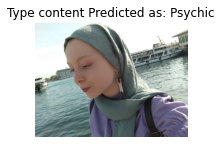

In [ ]:
prediction_test("/content/yineben.jpg")

1/1 [==============================] - 0s 18ms/step

/content/dino.jpg is type of content

Predicted as: Water


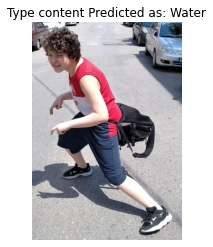

In [ ]:
prediction_test("/content/dino.jpg")

1/1 [==============================] - 0s 20ms/step

/content/makarnayiyosun.jpg is type of content

Predicted as: Normal


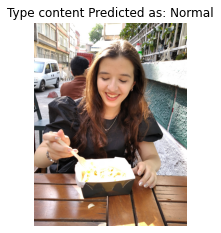

In [ ]:
prediction_test("/content/makarnayiyosun.jpg")

1/1 [==============================] - 0s 18ms/step

/content/aldim.png is type of content

Predicted as: Fire


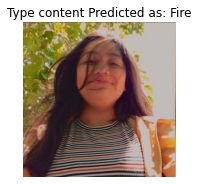

In [ ]:
prediction_test("/content/aldim.png")

1/1 [==============================] - 0s 38ms/step

/content/CfzMMKcWwAAM8b5.jpg is type of content

Predicted as: Grass


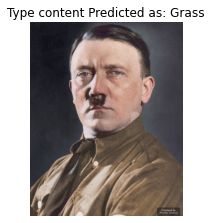

In [ ]:
prediction_test("/content/CfzMMKcWwAAM8b5.jpg")

1/1 [==============================] - 0s 23ms/step

/content/stalin.jpg is type of content

Predicted as: Water


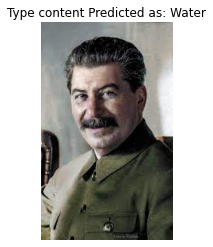

In [ ]:
prediction_test("/content/stalin.jpg")

1/1 [==============================] - 0s 19ms/step

/content/collection1.jpg-1280.jpg is type of content

Predicted as: Fire


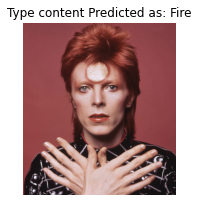

In [ ]:
prediction_test("/content/collection1.jpg-1280.jpg")

1/1 [==============================] - 0s 72ms/step

/content/Elon_Musk_Royal_Society_(crop2).jpg is type of content

Predicted as: Electric


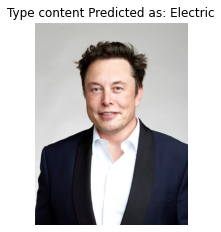

In [ ]:
prediction_test("/content/Elon_Musk_Royal_Society_(crop2).jpg")

1/1 [==============================] - 0s 16ms/step

/content/rte.jpg is type of content

Predicted as: Bug


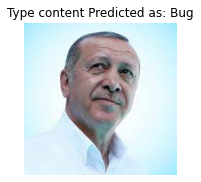

In [ ]:
prediction_test("/content/rte.jpg")

1/1 [==============================] - 0s 42ms/step

/content/putin.jpg is type of content

Predicted as: Grass


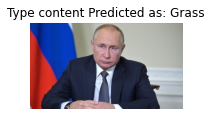

In [ ]:
prediction_test("/content/putin.jpg")

1/1 [==============================] - 0s 55ms/step

/content/churchman.jpg is type of content

Predicted as: Poison


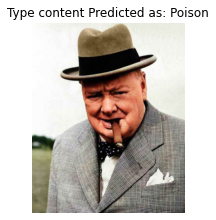

In [ ]:
prediction_test("/content/churchman.jpg")

1/1 [==============================] - 0s 79ms/step

/content/anyaaa.jpg is type of content

Predicted as: Ghost


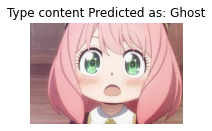

In [ ]:
prediction_test("/content/anyaaa.jpg")